In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%ls

drive/  sample_data/


In [5]:
%cd 'drive/My Drive'

/content/drive/My Drive


In [ ]:
%ls

In [8]:
%cd fer2013/

/content/drive/My Drive/fer2013


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from PIL import Image
from scipy import ndimage
import cv2


In [14]:
df = pd.read_csv('fer2013.csv')

In [15]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [16]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [17]:
df['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object

In [18]:
df.shape

(35887, 3)

In [19]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [20]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [21]:
print('null values:',df.isnull().sum())

null values: emotion    0
pixels     0
Usage      0
dtype: int64


In [22]:
print("data types:\n",df.dtypes)

data types:
 emotion     int64
pixels     object
Usage      object
dtype: object


In [23]:
import math
'''Getting the dimensions of the image in square form'''
math.sqrt(len(df['pixels'][0].split(' ')))

48.0

In [24]:
'''Setting the text labels to numerical labels'''
text_label={0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

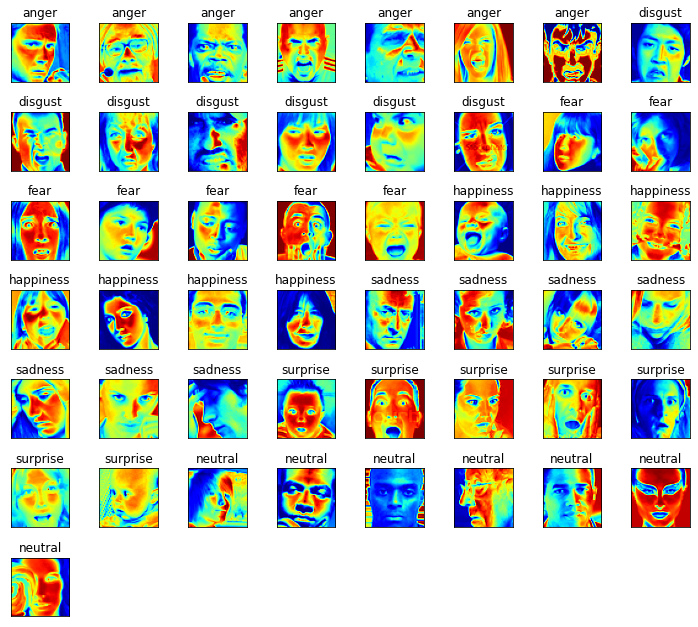

In [25]:
fig = plt.figure(1, (10, 10))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        '''Gives pixel values for the kth image from all the images who have same label in string form '''
        px = df[df.emotion==label]['pixels'].iloc[k]
        '''converting the string form to array form to convert string type to float and reshaping the array to square'''
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        
        k += 1
        
        '''Getting the axes'''
        ax = plt.subplot(8, 8, k)
        ax.imshow(px, cmap='jet')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(text_label[label])
        plt.tight_layout()